In [67]:
import matplotlib as mpl
from matplotlib import pyplot as plt

import pandas as pd
from os import path
import seaborn as sns

mpl.style.use('seaborn-notebook')

#sorted(mpl.style.available)


In [7]:
HDFStore=pd.HDFStore
mpl.rcParams['figure.figsize'] = [35.0, 7.0]

In [8]:
root_path = "/media/spolex/DATA/elekin/data"
rdo_root_path = path.join(root_path,"results/03-HANDWRITTING")
h5file = path.join(rdo_root_path, "archimedean-")
h5filename = h5file + str(17) + ".h5"
hdf = HDFStore(h5filename)

In [9]:
hdf

<class 'pandas.io.pytables.HDFStore'>
File path: /media/spolex/DATA/elekin/data/results/03-HANDWRITTING/archimedean-17.h5

In [10]:
dataset = hdf.get('source/dataset')
labels = hdf.get('source/labels')
y = labels.reset_index()['labels']

In [11]:
dataset

,x,y,timestamp,pen_up,azimuth,altitude,pressure,subject_id,labels
0,5310,3728,1845198,1,3280,810,238,C01_11,0.0
1,5311,3726,1845206,1,3280,810,320,C01_11,0.0
2,5311,3726,1845213,1,3280,810,302,C01_11,0.0
3,5312,3725,1845221,1,3280,810,260,C01_11,0.0
4,5313,3725,1845228,1,3280,810,244,C01_11,0.0
...,...,...,...,...,...,...,...,...,...
3492,1958,4201,1891016095,1,290,800,741,T029_02,1.0
3493,1957,4201,1891016102,1,310,780,595,T029_02,1.0
3494,1956,4201,1891016110,1,310,780,396,T029_02,1.0
3495,1952,4203,1891016118,1,310,780,152,T029_02,1.0


In [12]:
hdf.keys()

['/source/dataset',
 '/source/labels',
 '/results/residues/features',
 '/results/residues/rd',
 '/results/radius/features',
 '/results/radius/r']

In [13]:
rd_features = hdf['results/residues/features']
rd_rd = hdf['results/residues/rd']

In [14]:
rd_rd.shape,rd_features.shape,labels.shape

((4096, 50), (50, 27), (50,))

In [15]:
rd_features.columns

Index(['mean_abs_val(L)', 'np.var(L)', 'root_mean_square(L)',
       'log_detector(L)', 'wl(L)', 'np.nanstd(L)', 'diff_abs_std(L)',
       'higuchi(L)', 'mfl(L)', 'myo(L)', 'iemg(L)', 'ssi(L)', 'zc(L)',
       'ssc(L)', 'wamp(L)', 'p_max(Pxx, L)', 'f_max(Pxx)', 'mp(Pxx)',
       'tp(Pxx)', 'meanfreq(L)', 'medfreq(L)', 'std_psd(Pxx)',
       'mmnt(Pxx, order=1)', 'mmnt(Pxx, order=2)', 'mmnt(Pxx, order=3)',
       'kurt(Pxx)', 'skw(Pxx)'],
      dtype='object')

In [37]:
df=rd_features.join(labels)

<AxesSubplot:>

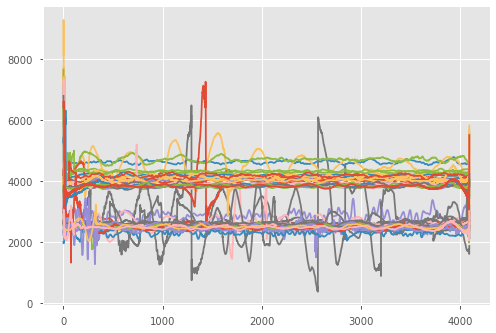

In [68]:
rd_rd.plot(legend=False)

In [53]:
corrMatrix = df.corr().abs()
print (corrMatrix)

                     mean_abs_val(L)  np.var(L)  root_mean_square(L)  \
mean_abs_val(L)             1.000000   0.074118             0.997908   
np.var(L)                   0.074118   1.000000             0.057204   
root_mean_square(L)         0.997908   0.057204             1.000000   
log_detector(L)             0.094909   0.960460             0.080206   
wl(L)                       0.053044   0.802316             0.036397   
np.nanstd(L)                0.042165   0.926341             0.025881   
diff_abs_std(L)             0.190880   0.676467             0.197987   
higuchi(L)                  0.270091   0.056940             0.259016   
mfl(L)                      0.013131   0.480623             0.026129   
myo(L)                      0.097935   0.957272             0.083387   
iemg(L)                     1.000000   0.074118             0.997908   
ssi(L)                      0.997908   0.057204             1.000000   
zc(L)                       0.120968   0.241728             0.11

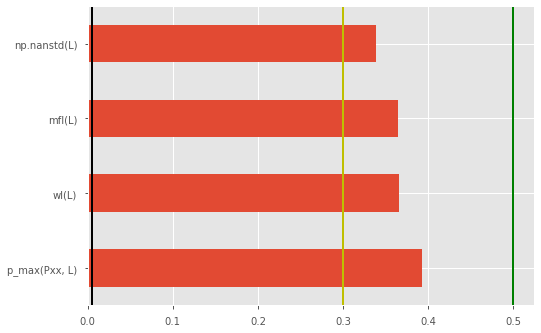

In [104]:
corrMatrix.labels.sort_values(ascending=False)[1:5].plot.barh()
plt.plot([0.5, 0.5],[-1.0,10.0], 'g-', lw=2)
plt.plot([0.3, 0.3],[-1.0,10.0], 'y-', lw=2)
plt.plot([0.005, 0.005],[-1.0,10.0], 'k-', lw=2)



In [18]:
hdf.close()